In [1]:
import img_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm import tqdm
from naive_bayes import NaiveBayes
from logistic_regression import LogisticRegression

%matplotlib inline

In [2]:
imgs = img_utils.load_dataset()

100%|██████████| 2269/2269 [00:14<00:00, 151.65it/s]


In [2]:
sizes = [1, 2, 4, 8, 16, 32, 64]
params = {'nb':[], 'lr':[]}

In [4]:
for size in tqdm(sizes):
    (x_train, x_test, y_train, y_test), labels = img_utils.make_train_test_sets(img_utils.downsize_set(imgs, size))
    nb = NaiveBayes()
    lr = LogisticRegression()
    nb.fit(x_train, y_train)
    params['nb'].append(nb.model.class_prior_.size + nb.model.theta_.size + nb.model.sigma_.size)
    lr.fit(x_train, y_train)
    params['lr'].append(lr.model.coef_.size + lr.model.intercept_.size)


    
    

100%|██████████| 7/7 [06:01<00:00, 88.87s/it]


In [31]:
pprint(params['nb'])

[28, 100, 388, 1540, 6148, 24580, 98308]


In [32]:
pprint(params['lr'])

[16, 52, 196, 772, 3076, 12292, 49156]


In [33]:
n_features = [size**2*3 for size in sizes]
n_features

[3, 12, 48, 192, 768, 3072, 12288]

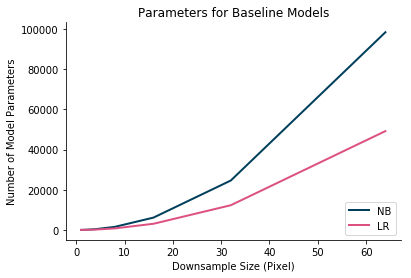

In [34]:
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes, [params['nb'], params['lr']], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters for Baseline Models', color=[0, 3], label=['NB', 'LR'], multi=True)

In [4]:
def get_nb_params(size, n_classes=4):
    return n_classes + 2*(3*(size**2))*n_classes

def get_lr_params(size, n_classes=4):
    return n_classes + (3*(size**2))

def get_n_features(size):
    return 3*(size**2)

def get_clgbm_params(size, n_classes=4):
    return 3*(size**2)*n_classes*2 + (n_classes)

size = 32
print(get_nb_params(size))
print(get_lr_params(size))
print(get_clgbm_params(size))

24580
3076
24580


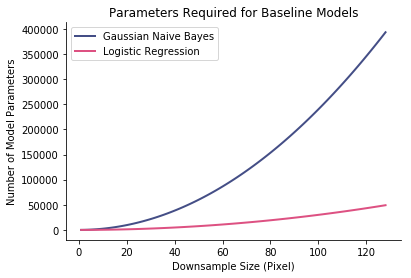

In [5]:
sizes_lin = np.linspace(1, 128, 100)
sizes_nb = [get_nb_params(size) for size in sizes_lin]
sizes_lr = [get_lr_params(size) for size in sizes_lin]
# sizes_nf = [get_n_features(size) for size in sizes_lin]
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes_lin, [sizes_nb, sizes_lr], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters Required for Baseline Models', color=[1, 3], label=['Gaussian Naive Bayes', 'Logistic Regression'], 
                    multi=True, loc="upper left")
# plt.savefig('../report/param_graph.png', dpi=300, bbox_inches='tight')

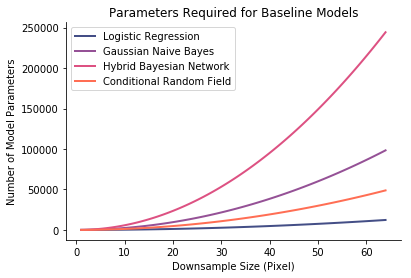

In [9]:
from scipy.interpolate import interp1d
sizes_lin = np.linspace(1, 64, 100)

x=[1, 2, 4, 8, 16, 32, 64]
y=[39, 195, 867, 3651, 14979, 60675, 244227]
f = interp1d(x, y, kind='cubic')
sizes_bn = f(sizes_lin)

x=[1,2,4,8,16,32,64,128]
y=[16, 52, 196, 766, 3064, 12262, 48834, 195726]
f = interp1d(x, y, kind='cubic')
sizes_crf = f(sizes_lin)

sizes_nb = [get_nb_params(size) for size in sizes_lin]
sizes_lr = [get_lr_params(size) for size in sizes_lin]
sizes_nf = [get_n_features(size) for size in sizes_lin]
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes_lin, [sizes_lr, sizes_nb, sizes_bn, sizes_crf], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters Required for Baseline Models', color=[1, 2, 3, 4, 5], 
                   label=['Logistic Regression', 'Gaussian Naive Bayes', 'Hybrid Bayesian Network', 'Conditional Random Field'], 
                   multi=True, loc="upper left")
# plt.savefig('../report/param_graph.png', dpi=300, bbox_inches='tight')

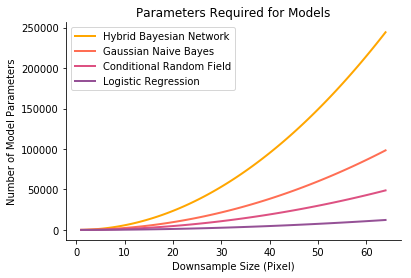

In [21]:
from scipy.interpolate import interp1d
sizes_lin = np.linspace(1, 64, 100)

x=[1, 2, 4, 8, 16, 32, 64]
y=[39, 195, 867, 3651, 14979, 60675, 244227]
f = interp1d(x, y, kind='cubic')
sizes_bn = f(sizes_lin)

x=[1,2,4,8,16,32,64,128]
y=[16, 52, 196, 766, 3064, 12262, 48834, 195726]
f = interp1d(x, y, kind='cubic')
sizes_crf = f(sizes_lin)

sizes_nb = [get_nb_params(size) for size in sizes_lin]
sizes_lr = [get_lr_params(size) for size in sizes_lin]
sizes_nf = [get_n_features(size) for size in sizes_lin]
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes_lin, [sizes_bn, sizes_nb, sizes_crf, sizes_lr], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters Required for Models', color=[5, 4, 3, 2], 
                   label=['Hybrid Bayesian Network', 'Gaussian Naive Bayes', 'Conditional Random Field', 'Logistic Regression'], 
                   multi=True, loc="upper left")
plt.savefig('../report/param_graph.png', dpi=300, bbox_inches='tight')

In [22]:
4+4*2*3*(16**2)

6148